### Required dependencies
You'll need recent versions of Jupyter (but if you're reading this, you are probably OK), scikit-learn, numpy, pandas and matplotlib and/or seaborn. The most recent versions should be fine. You are free to use any other package under the sun, but I suspect you will be at least needing the above.

I advise you to use a form of virtual environments to manage your python projects (e.g. venv, conda etc.).

To get free GPU time, you can try Google Colab. It is a tool for running notebooks like this on the fly, and provides you with a VM and a GPU for free. Almost all packages for machine learning are automatically installed, and I suspect you could do the entire project on Colab if you wanted to. Still, it is useful to learn how to set up your environment on your own pc as well, and Colab is a bit more complicated when you have to import your datasets (best to import/download them from a Google Drive for speed instead of uploading them from local machines). Colab could become useful if you intend to try the deep learning approaches with TensorFlow and PyTorch, and you don't have a GPU yourself.

In [1]:
# numerical library:
import numpy as np

# data manipulation library:
import pandas as pd

# standard packages used to handle files:
import sys
import os 
import glob
import time

# scikit-learn machine learning library:
import sklearn

# plotting:
import matplotlib.pyplot as plt

# tell matplotlib that we plot in a notebook:
%matplotlib notebook

Define your folder structure with your data:

In [2]:
data_folder = "./"

In [3]:
train_data = pd.read_csv(data_folder + "train.csv")
test_data = pd.read_csv(data_folder + "test.csv")

### Data exploration
Let's take a look at our train and test data:

In [4]:
train_data.head()

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Gokart rental count
0,07/10/2018,22,13.6,38,1.5,2000,-0.4,0.00,0.0,0.0,Autumn,No Holiday,Yes,1160
1,04/02/2018,0,-10.4,49,2.4,2000,-19.0,0.00,0.0,0.0,Winter,No Holiday,Yes,98
2,31/07/2018,20,33.5,50,2.1,2000,21.6,0.04,0.0,0.0,Summer,No Holiday,Yes,1772
3,15/09/2018,0,21.8,83,1.5,2000,18.7,0.00,0.0,0.0,Autumn,No Holiday,Yes,906
4,10/03/2018,6,1.1,78,1.1,538,-2.3,0.00,0.0,0.0,Spring,No Holiday,Yes,74


Let's take a look at our first 200 datapoints in the training set (which spans about the entire time period of all the data, but only 200 random samples of it!):

<IPython.core.display.Javascript object>


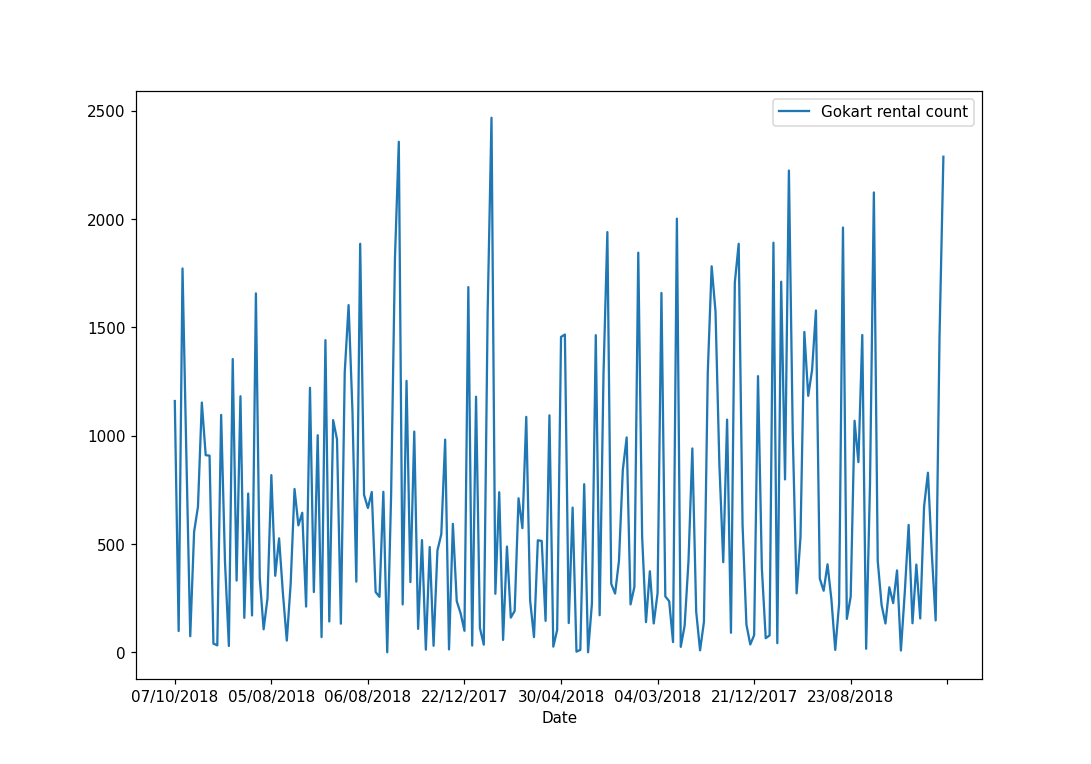

<AxesSubplot: xlabel='Date'>

In [5]:
train_data[0:200].plot(x="Date", y="Gokart rental count", figsize=(10,7))

In [6]:
test_data.head()

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,02/07/2018,16,25.2,87,0.9,601,22.8,0.88,0.0,0.0,Summer,No Holiday,Yes
1,27/10/2018,21,7.3,49,3.4,2000,-2.7,0.00,0.0,0.0,Autumn,No Holiday,Yes
2,16/02/2018,13,3.5,17,3.2,1971,-19.3,2.20,0.0,0.0,Winter,Holiday,Yes
3,10/08/2018,10,30.5,58,0.6,1875,21.2,1.84,0.0,0.0,Summer,No Holiday,Yes
4,08/01/2018,17,2.7,50,2.8,1957,-6.7,0.06,0.0,0.0,Winter,No Holiday,Yes


### Building a first submission

For a first submission, let's just take the average consumption for the Gokart rental count of the training set, and use this value for all test samples:

In [7]:
average_count = train_data["Gokart rental count"].mean()
print(average_count)

704.1734


Let's put this in a numpy array with length of our test dataset. For the assignment, 'predictions' will be the output of your machine learning models, instead of just creating this average guess:

In [8]:
predictions = np.full(test_data.shape[0], average_count)
len(predictions)

3760

Create a unique filename based on timestamp:

In [9]:
def generate_unique_filename(basename, file_ext):
    """Adds a timestamp to filenames for easier tracking of submissions, models, etc."""
    timestamp = time.strftime("%Y%m%d-%H%M%S", time.localtime())
    return basename + '_' + timestamp + '.' + file_ext

Let's create our pandas dataframe and write it to csv. You can submit this file to Kaggle. It is very important that your submission also has the 'Id' and 'Predicted' column, with the Ids corresponding to the index of the test dataset. Normally your test data does not get mixed when doing predictions, so this should not be a problem.

In [10]:
submission = pd.DataFrame(data=predictions, columns=["Predicted"])
submission.reset_index(inplace=True)
submission = submission.rename(columns = {'index':'Id'})
submission.head()

,Id,Predicted
0,0,704.1734
1,1,704.1734
2,2,704.1734
3,3,704.1734
4,4,704.1734


In [11]:
submission.to_csv(generate_unique_filename("average_submission", "csv"), index=False)